In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

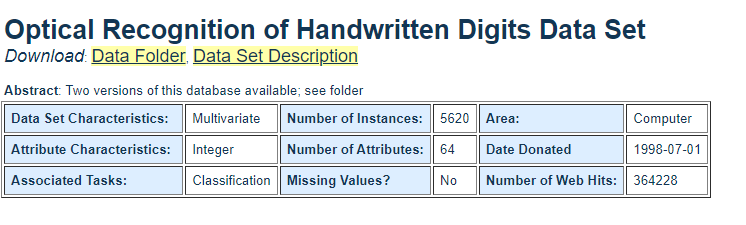

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [ ]:
#obtenemos los datos 
digits = load_digits()

In [ ]:
np.random.seed(100)

In [ ]:
X = digits.data
y = digits.target

In [ ]:
#estandarizamos los datos de X
from sklearn import preprocessing
X_estandarizada = preprocessing.scale(X)
X = X_estandarizada

In [ ]:
# divicion datos de prueba y entrenamiento 70% entrenamiento - 30% prueba  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1970)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

#Creacion red neuronal tensorflow.keras

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1257, 64) (540, 64) (1257,) (540,)


In [ ]:
model = Sequential()

#Asignamos el tamaño de entrada 
model.add(Input(shape=(64,)))

#capas de 10 neuronas cada una 
model.add(Dense(10, activation='sigmoid', name = 'capa1'))#'sigmoid'))
model.add(Dropout(0.25,name='dropout')) #drop el 0.25 datos de la capa1
model.add(Dense(10, activation='sigmoid', name = 'capasalida'))

#model.add(Dense(3, activation='relu'))
#model.add(Dense(3, activation='relu'))
#model.add(Dense(10, activation='relu'))

In [ ]:
#compilamos la red neuronal 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# podemos ver la tabla del modelo 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa1 (Dense)               (None, 10)                650       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 capasalida (Dense)          (None, 10)                110       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


#Entrenamiento del modelo

In [ ]:
cbez = EarlyStopping(monitor='accuracy',
                     min_delta=0.01,
                      mode='max',
                      patience=10,
                    )
#%%

epk1 = 100
model.fit(X_train, y_train, epochs=epk1, callbacks=[cbez], validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 2.4347 - accuracy: 0.1114 - val_loss: 2.2924 - val_accuracy: 0.0952
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 2.2670 - accuracy: 0.1483 - val_loss: 2.1618 - val_accuracy: 0.1508
Epoch 3/100
32/32 [==============================] - 0s 11ms/step - loss: 2.1561 - accuracy: 0.1910 - val_loss: 2.0621 - val_accuracy: 0.1984
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 2.0657 - accuracy: 0.2418 - val_loss: 1.9783 - val_accuracy: 0.3254
Epoch 5/100
32/32 [==============================] - 1s 20ms/step - loss: 1.9975 - accuracy: 0.2915 - val_loss: 1.9049 - val_accuracy: 0.4405
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 1.9382 - accuracy: 0.3373 - val_loss: 1.8421 - val_accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 1.8734 - accuracy: 0.4090 - val_loss: 1.7855 - val_accuracy: 0.5635
Epoch 8/1

#predicciones

In [ ]:
y_new = np.argmax(model.predict(X_test),axis=1)
y_esperado = y_test
y_predicho = y_new

17/17 [==============================] - 1s 11ms/step


#efectividad de clasificacion

In [ ]:
#precisión 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_esperado,y_predicho))

0.9203703703703704


el sistema es capaz de clasificar mas del 90% de los datos de prueba correctamente

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_esperado,y_predicho, average = 'micro')

0.9203703703703704

In [ ]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_esperado, y_predicho)

array([[57,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 57,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  1,  0,  0,  3,  1],
       [ 0,  2,  0,  0, 59,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  2,  0, 47,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  2,  0, 48,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 45,  0,  1],
       [ 1,  2,  0,  2,  0,  4,  1,  0, 37,  1],
       [ 0,  2,  0,  0,  0,  3,  0,  1,  1, 50]])

In [ ]:
#curvas ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_esperado, y_predicho, pos_label=2)

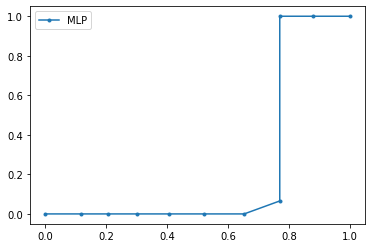

In [ ]:
plt.plot(fpr,tpr,marker='.', label = 'MLP')
plt.legend()
plt.show()

In [ ]:
print('fpr: ',fpr)

fpr:  [0.         0.11691023 0.2045929  0.30271399 0.40709812 0.52192067
 0.65344468 0.77035491 0.77035491 0.87891441 1.        ]


In [ ]:
print('tpr: ',tpr)

tpr:  [0.         0.         0.         0.         0.         0.
 0.         0.06557377 1.         1.         1.        ]


In [ ]:
print('thresholds: ',thresholds)

thresholds:  [10  9  8  7  6  5  4  3  2  1  0]
